In [1]:
#all the python library imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from datetime import datetime, date
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

In [2]:
#reading the given json as a dataframe
df = pd.read_json('deliveryDatasetChallenge.json')
df = pd.DataFrame(df['anonID;birthdate;routeDate;region;gender;areaWealthLevel;areaPopulation;badWeather;weatherRestrictions;routeTotalDistance;numberOfShops;marketShare;avgAreaBenefits;timeFromAvg;advertising;employeeLYScore;employeeTenure;employeePrevComps;success'].str.split(';',19).tolist(),
                                 columns = ['anonID','birthdate','routeDate','region','gender','areaWealthLevel','areaPopulation','badWeather','weatherRestrictions','routeTotalDistance','numberOfShops','marketShare','avgAreaBenefits','timeFromAvg','advertising','employeeLYScore','employeeTenure','employeePrevComps','success'])

In [3]:
df.head(5)

,anonID,birthdate,routeDate,region,gender,areaWealthLevel,areaPopulation,badWeather,weatherRestrictions,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success
0,XLKC1691,23/10/1969,19/05/2020,NA,M,Mid,30.66,No,No,28.3,26,49,18.9,0.35,3,4,1,1,NA
1,KANY6459,14/04/1976,19/05/2020,LATAM,M,Mid,52.5,No,No,21.3,28,96,14.28,0.47,3,4,3,2,NA
2,ULUZ5859,03/04/1985,NA,NA,M,High,25.08,Yes,No,25.9,25,76,14.01,NA,2,3,1,1,NA
3,LDCQ7279,24/03/1968,11/05/2020,NA,M,Mid,37.14,No,No,24.3,26,65,19.2,-0.37,2,4,3,2,NA
4,KIUB5860,22/04/1978,19/05/2020,AMESA,M,Low,11.71,No,No,22.7,22,72,12.37,0.44,2,3,3,2,NA


In [4]:
df.info

<bound method DataFrame.info of          anonID   birthdate  ... employeePrevComps success
0      XLKC1691  23/10/1969  ...                 1      NA
1      KANY6459  14/04/1976  ...                 2      NA
2      ULUZ5859  03/04/1985  ...                 1      NA
3      LDCQ7279  24/03/1968  ...                 2      NA
4      KIUB5860  22/04/1978  ...                 2      NA
...         ...         ...  ...               ...     ...
29384  MTVA4012  21/06/1976  ...                 3       0
29385  HLWO9554  14/12/1985  ...                 1       1
29386  LRYK5563  17/02/1972  ...                 3       1
29387  ALFW5863  14/09/1969  ...                 2       0
29388  UTYD2330  23/02/1974  ...                 1       1

[29389 rows x 19 columns]>

In [5]:
#replacing all 'NA' strigs with numpy NaN for easier feature engineering
list_col = df.columns
for col in list_col:
  df[col] = df[col].replace('NA',np.nan)


In [6]:
df.head(5)

,anonID,birthdate,routeDate,region,gender,areaWealthLevel,areaPopulation,badWeather,weatherRestrictions,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success
0,XLKC1691,23/10/1969,19/05/2020,NaN,M,Mid,30.66,No,No,28.3,26,49,18.9,0.35,3,4,1,1,NaN
1,KANY6459,14/04/1976,19/05/2020,LATAM,M,Mid,52.5,No,No,21.3,28,96,14.28,0.47,3,4,3,2,NaN
2,ULUZ5859,03/04/1985,NaN,NaN,M,High,25.08,Yes,No,25.9,25,76,14.01,NaN,2,3,1,1,NaN
3,LDCQ7279,24/03/1968,11/05/2020,NaN,M,Mid,37.14,No,No,24.3,26,65,19.2,-0.37,2,4,3,2,NaN
4,KIUB5860,22/04/1978,19/05/2020,AMESA,M,Low,11.71,No,No,22.7,22,72,12.37,0.44,2,3,3,2,NaN


In [7]:
#converting date features into datetime readable format 
df['birthdate'] =  pd.to_datetime(df['birthdate'], format='%d/%m/%Y')

#converting date of birth into age and dropping the column
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

df['Age'] = df['birthdate'].apply(age)

#also dropping routeDate because all dates fall in the same month (17 months from now) and does not have any impact on the model
data=df.drop(['birthdate','routeDate'],axis=1)
  
display(data)

,anonID,region,gender,areaWealthLevel,areaPopulation,badWeather,weatherRestrictions,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success,Age
0,XLKC1691,NaN,M,Mid,30.66,No,No,28.3,26,49,18.9,0.35,3,4,1,1,NaN,52
1,KANY6459,LATAM,M,Mid,52.5,No,No,21.3,28,96,14.28,0.47,3,4,3,2,NaN,45
2,ULUZ5859,NaN,M,High,25.08,Yes,No,25.9,25,76,14.01,NaN,2,3,1,1,NaN,36
3,LDCQ7279,NaN,M,Mid,37.14,No,No,24.3,26,65,19.2,-0.37,2,4,3,2,NaN,53
4,KIUB5860,AMESA,M,Low,11.71,No,No,22.7,22,72,12.37,0.44,2,3,3,2,NaN,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29384,MTVA4012,LATAM,M,Mid,10.58,No,No,27.6,27,92,14.11,1.75,0,1,1,3,0,45
29385,HLWO9554,APAC,M,Mid,27.93,No,No,22.3,24,61,13.44,0.2,1,3,2,1,1,36
29386,LRYK5563,Europe,M,High,20.33,No,No,28.7,24,69,26.75,0.8,3,4,2,3,1,49
29387,ALFW5863,APAC,M,NaN,7.56,Yes,No,25,24,59,14.28,NaN,2,3,1,2,0,52


In [8]:
#dropping anonID because it has no relevance to the prediction
id_column=data.pop('anonID')

In [9]:
#one hot encoding the categorical variables
cat_var = ['region','gender','areaWealthLevel']
data = pd.get_dummies(data, columns = cat_var)

In [10]:
data.head(5)

,areaPopulation,badWeather,weatherRestrictions,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success,Age,region_AMESA,region_APAC,region_Europe,region_LATAM,gender_F,gender_M,gender_X,areaWealthLevel_High,areaWealthLevel_Low,areaWealthLevel_Mid
0,30.66,No,No,28.3,26,49,18.9,0.35,3,4,1,1,NaN,52,0,0,0,0,0,1,0,0,0,1
1,52.5,No,No,21.3,28,96,14.28,0.47,3,4,3,2,NaN,45,0,0,0,1,0,1,0,0,0,1
2,25.08,Yes,No,25.9,25,76,14.01,NaN,2,3,1,1,NaN,36,0,0,0,0,0,1,0,1,0,0
3,37.14,No,No,24.3,26,65,19.2,-0.37,2,4,3,2,NaN,53,0,0,0,0,0,1,0,0,0,1
4,11.71,No,No,22.7,22,72,12.37,0.44,2,3,3,2,NaN,43,1,0,0,0,0,1,0,0,1,0


In [11]:
#instead of dropping rows with null values replacing them with median
data['timeFromAvg'] = data['timeFromAvg'].fillna((data['timeFromAvg'].median()))


In [12]:
data.info

<bound method DataFrame.info of       areaPopulation badWeather  ... areaWealthLevel_Low areaWealthLevel_Mid
0              30.66         No  ...                   0                   1
1               52.5         No  ...                   0                   1
2              25.08        Yes  ...                   0                   0
3              37.14         No  ...                   0                   1
4              11.71         No  ...                   1                   0
...              ...        ...  ...                 ...                 ...
29384          10.58         No  ...                   0                   1
29385          27.93         No  ...                   0                   1
29386          20.33         No  ...                   0                   0
29387           7.56        Yes  ...                   0                   0
29388          25.62         No  ...                   0                   0

[29389 rows x 24 columns]>

In [13]:
#label encoding the categorical variables and keeping the sequence
le = preprocessing.LabelEncoder()
label_encode = ['badWeather','weatherRestrictions']
for col in label_encode:
  data[col] = le.fit_transform(data[col])

In [14]:
data.head(5)

,areaPopulation,badWeather,weatherRestrictions,routeTotalDistance,numberOfShops,marketShare,avgAreaBenefits,timeFromAvg,advertising,employeeLYScore,employeeTenure,employeePrevComps,success,Age,region_AMESA,region_APAC,region_Europe,region_LATAM,gender_F,gender_M,gender_X,areaWealthLevel_High,areaWealthLevel_Low,areaWealthLevel_Mid
0,30.66,0,0,28.3,26,49,18.9,0.35,3,4,1,1,NaN,52,0,0,0,0,0,1,0,0,0,1
1,52.5,0,0,21.3,28,96,14.28,0.47,3,4,3,2,NaN,45,0,0,0,1,0,1,0,0,0,1
2,25.08,1,0,25.9,25,76,14.01,0.08,2,3,1,1,NaN,36,0,0,0,0,0,1,0,1,0,0
3,37.14,0,0,24.3,26,65,19.2,-0.37,2,4,3,2,NaN,53,0,0,0,0,0,1,0,0,0,1
4,11.71,0,0,22.7,22,72,12.37,0.44,2,3,3,2,NaN,43,1,0,0,0,0,1,0,0,1,0


In [15]:
#updating the NA values in avgAreaBenefits with 0
data['avgAreaBenefits'] = data['avgAreaBenefits'].fillna(0)

In [16]:
#splitting the data based of target variable
mask = data['success'].isnull()
data_witout_success_pred = data[mask]
data = data[~mask]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


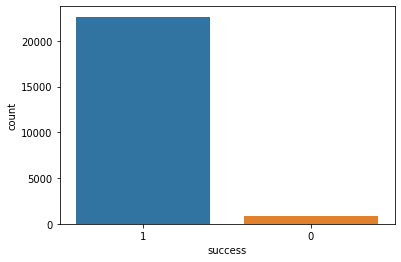

In [17]:
#plotting the target variable
sns.countplot(data['success'])

In [18]:
data['success'].value_counts()

1    22647
0      864
Name: success, dtype: int64

success rate in prediction variable in given data is very high which shows the highly imbalanced data

In [19]:
#converting the data type object to numeric for further data analysis
for i in data.columns:
  data = data.apply(pd.to_numeric)


In [20]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
areaPopulation,23511.0,26.875914,24.357718,1.15,7.36,21.73,41.37,1832.47
badWeather,23511.0,0.084811,0.278607,0.00,0.00,0.00,0.00,1.00
weatherRestrictions,23511.0,0.014802,0.120761,0.00,0.00,0.00,0.00,1.00
routeTotalDistance,23511.0,24.402497,3.280378,13.90,22.50,24.00,25.90,108.50
numberOfShops,23511.0,24.841904,10.678161,18.00,23.00,25.00,27.00,1623.00
marketShare,23511.0,69.872698,14.671810,15.00,60.00,70.00,80.00,100.00
avgAreaBenefits,23511.0,19.213775,9.247303,0.00,14.91,18.01,21.02,145.53
timeFromAvg,23511.0,0.034612,0.420185,-1.25,-0.06,0.08,0.20,1.82
advertising,23511.0,1.920548,1.110554,0.00,1.00,2.00,3.00,3.00
employeeLYScore,23511.0,3.334907,0.839298,1.00,3.00,3.00,4.00,5.00


It is visible in the data that features **areaPopulation, routeTotalDistance, numberOfShops and avgAreaBenefits** have outliers and need to be handled

In [21]:
 #imputing the outliers with median values
 features_with_outliers = ['areaPopulation', 'routeTotalDistance', 'numberOfShops', 'marketShare','avgAreaBenefits']
 for i in features_with_outliers:
  val_50= data[i].quantile(0.50) 
  val_95= data[i].quantile(0.95)
  data[i] = np.where(data[i] > val_95, val_50, data[i])
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
areaPopulation,23511.0,24.105025,17.806956,1.15,7.36,21.73,35.97,66.01
badWeather,23511.0,0.084811,0.278607,0.00,0.00,0.00,0.00,1.00
weatherRestrictions,23511.0,0.014802,0.120761,0.00,0.00,0.00,0.00,1.00
routeTotalDistance,23511.0,23.962201,2.493324,13.90,22.50,24.00,25.50,30.00
numberOfShops,23511.0,24.578750,2.108397,18.00,23.00,25.00,26.00,28.00
marketShare,23511.0,68.530985,13.198384,15.00,60.00,70.00,78.00,95.00
avgAreaBenefits,23511.0,17.669343,3.996695,0.00,14.91,18.01,20.35,28.26
timeFromAvg,23511.0,0.034612,0.420185,-1.25,-0.06,0.08,0.20,1.82
advertising,23511.0,1.920548,1.110554,0.00,1.00,2.00,3.00,3.00
employeeLYScore,23511.0,3.334907,0.839298,1.00,3.00,3.00,4.00,5.00


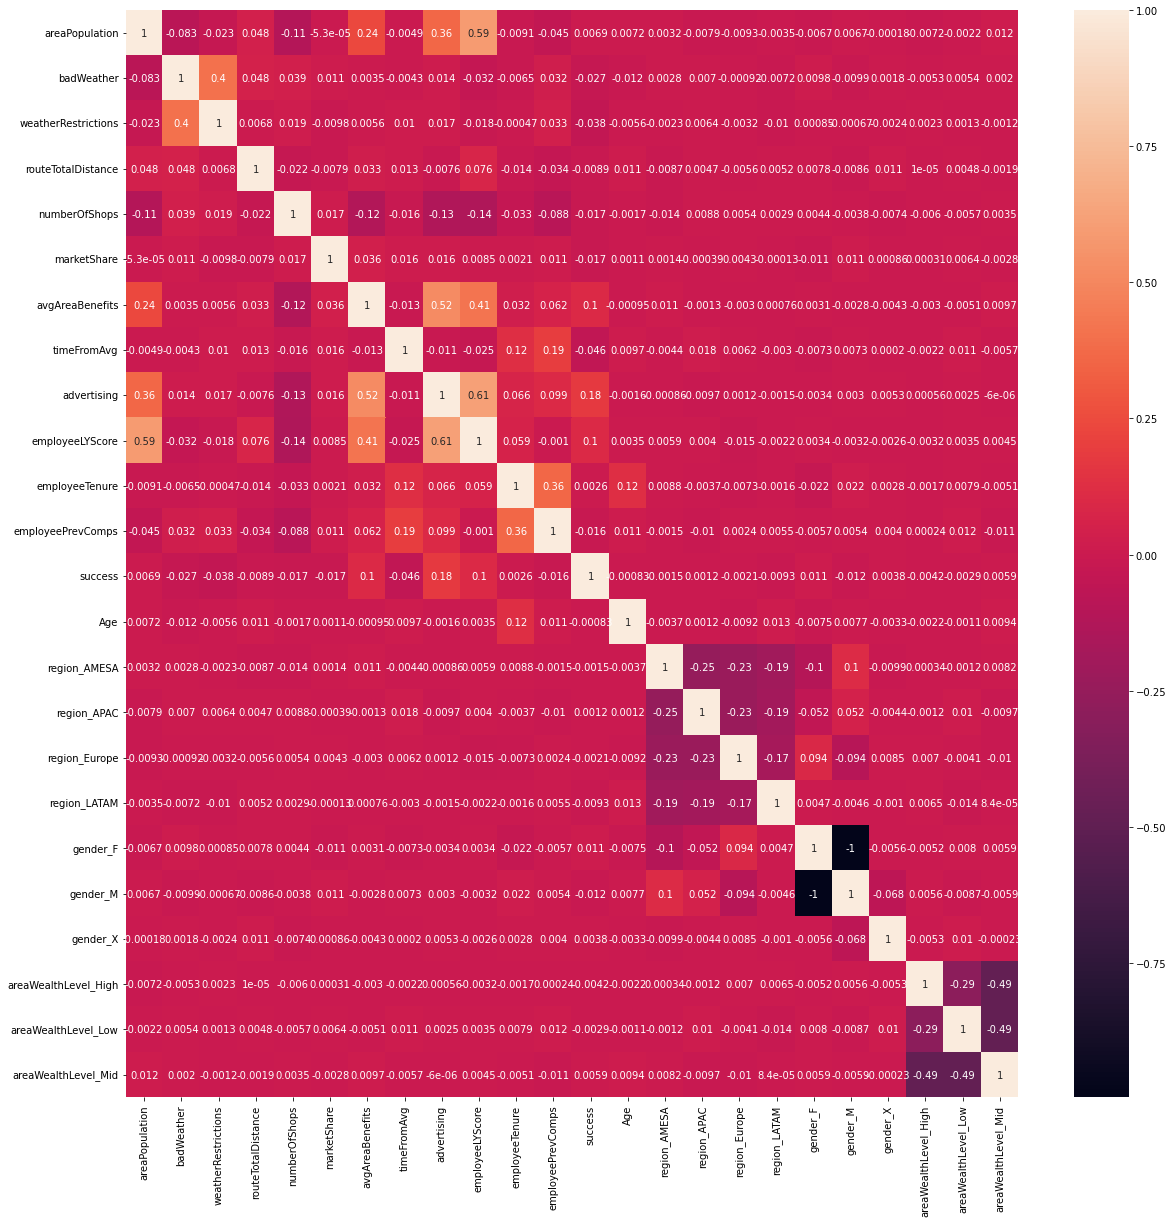

In [22]:
#plotting heatmap to understand the data correlation
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)



1.   Advertising and employeeLYcore are positively correlated
2.   gender male and female are negatively correlated understandably



In [23]:
#checking for any null values
data.isnull().values.any()
#data.columns[data.isna().any()].tolist()

False

upsampling the minority class to resolve data imbalance

In [24]:
y = data.success
x = data.drop('success', axis=1)

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

# concatenate our training data back together
x = pd.concat([x_train, y_train], axis=1)

# separate minority and majority classes
success = x[x.success==1]
no_success = x[x.success==0]

# upsample minority
no_success_upsampled = resample(no_success,
                          replace=True,
                          n_samples=len(success),
                          random_state=27)

# combine majority and upsampled minority
upsampled = pd.concat([success, no_success_upsampled])

# check new class counts
upsampled.success.value_counts()

1    16996
0    16996
Name: success, dtype: int64

In [25]:
y_train = upsampled.success
x_train = upsampled.drop('success', axis=1)

In [26]:
x_train.shape

(33992, 23)

In [27]:
x_test.shape

(5878, 23)

In [28]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [29]:
y_pred_lr=logreg.predict(x_test)

In [30]:
k_range=range(1,15)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred_knn=knn.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred_knn)
    scores_list.append(metrics.accuracy_score(y_test,y_pred_knn))
print (scores)
print(max(scores_list))

{1: 0.9538958829533855, 2: 0.9324600204151072, 3: 0.9324600204151072, 4: 0.9074515141204491, 5: 0.9074515141204491, 6: 0.8878870364069411, 7: 0.8878870364069411, 8: 0.8683225586934331, 9: 0.8683225586934331, 10: 0.8473970738346376, 11: 0.8473970738346376, 12: 0.8285130996937734, 13: 0.8285130996937734, 14: 0.8080979925144607}
0.9538958829533855


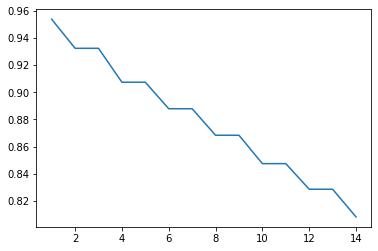

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)

In [32]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [33]:
bnb= BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_nb=bnb.predict(x_test)

In [34]:
rfc = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

In [35]:
#printing metrics for all models
models=[y_pred_lr,y_pred_nb,y_pred_knn,y_pred_rfc]
for i in models:
  acc_score= round(metrics.accuracy_score(y_test,i)*100,2)
  precision_score= round(metrics.precision_score(y_test,i)*100,2)
  recall_score= round(metrics.precision_score(y_test,i)*100,2)
  print('Precision score: ',precision_score)
  print('recall score: ',recall_score)
  print('accuracy score: ',acc_score)
  f_value= round((2*precision_score*recall_score)/(precision_score+recall_score),2)
  print('F measure: ',f_value)
  print('*****************************')

Precision score:  98.47
recall score:  98.47
accuracy score:  72.95
F measure:  98.47
*****************************
Precision score:  97.83
recall score:  97.83
accuracy score:  82.66
F measure:  97.83
*****************************
Precision score:  97.09
recall score:  97.09
accuracy score:  95.39
F measure:  97.09
*****************************
Precision score:  96.87
recall score:  96.87
accuracy score:  96.65
F measure:  96.87
*****************************


In [36]:
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test,y_pred_lr)
print(cm_lr)

[[ 163   64]
 [1526 4125]]


In [37]:
cm_knn=confusion_matrix(y_test,y_pred_nb)
print(cm_knn)

[[ 122  105]
 [ 914 4737]]


In [38]:
cm_nb=confusion_matrix(y_test,y_pred_knn)
print(cm_nb)

[[  61  166]
 [ 105 5546]]


In [39]:
cm_rfc=confusion_matrix(y_test,y_pred_rfc)
print(cm_rfc)

[[  45  182]
 [  15 5636]]


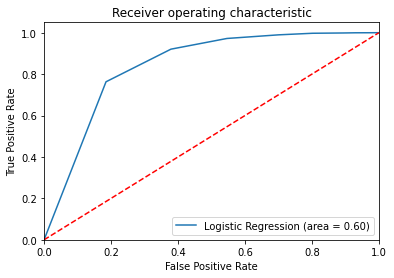

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rfc.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [41]:
act_pred=rfc.predict(data_witout_success_pred.loc[:,data_witout_success_pred.columns!='success'])
print(act_pred)
act_pred.shape
data_witout_success_pred['success'] = act_pred

[1 1 1 ... 1 1 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
prediction_data=data_witout_success_pred.join(id_column, sort=True)
result_data = prediction_data[['anonID','success']]

In [43]:
result_data.info

<bound method DataFrame.info of          anonID  success
0      XLKC1691        1
1      KANY6459        1
2      ULUZ5859        1
3      LDCQ7279        1
4      KIUB5860        1
...         ...      ...
29334  HQQL2460        1
29345  JTDZ8338        1
29356  NIJK7000        1
29367  LJGV2715        1
29378  RNGC9551        1

[5878 rows x 2 columns]>

In [44]:
result_data.to_csv('result.csv')